In [1]:
# 해시코드 질문 태그의 빈도 확인


In [2]:
# User-Agent 추가
user_agent = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36"}

In [7]:
# 질문의 빈도를 체크하는 딕셔너리를 만든 후, 빈도를 체크해보자. 
import time

frequency = {}

import requests
from bs4 import BeautifulSoup

for i in range(1,11):
    res = requests.get("https://hashcode.co.kr/?page={}".format(i), user_agent)
    soup = BeautifulSoup(res.text, "html.parser") #soup에는 요청을 보낸 것에 대한 정보가 parsing이 되어 저장되어 있음

    # ul 태그를 모두 찾고, 1번 안에 있응 li 태그의 text 추출

    ul_tags = soup.find_all("ul", "question-tags")
    for ul in ul_tags:
        li_tags = ul.find_all("li")
        for li in li_tags:
            tag = li.text.strip() # 공백 제거
            if tag not in frequency:
                frequency[tag] = 1
            else:
                frequency[tag] += 1
    time.sleep(0.5)
    
print(frequency)

{'css': 6, 'html': 6, 'java': 35, 'python': 244, 'crawling': 4, 'selenium': 12, 'algorithm': 3, 'list': 14, 'class': 5, 'private': 1, 'openpyxl': 3, 'c#': 4, 'web-crawling': 3, 'javascript': 11, 'python3': 3, 'selenium-webdrive': 2, 'random': 2, 'tuple': 2, 'pyinstaller': 2, 'mysql': 2, 'dataframe': 8, 'pandas': 13, 'function': 5, 'canvas': 1, 'fabric': 1, 'iterator': 1, 'c': 41, 'c++': 26, 'array': 9, 'advertisement': 1, 'node.js': 4, 'regression-analysis': 1, 'logistic-regression': 1, 'statsmodels': 1, 'oop': 1, 'program': 2, 'eclipse': 2, 'runtime-error': 1, 'dump': 1, 'flutter': 2, 'react': 2, 'webview': 1, 'error': 8, 'dev-c++': 1, 'dictionary': 5, 'qt': 2, 'qt-designer': 2, 'typescript': 2, 'environment-variables': 1, 'for': 10, 'preprocessor': 1, 'ai': 3, 'and': 1, 'tkinter': 4, 'socket': 2, 'loops': 5, 'header': 1, 'python3.6.1': 1, 'len': 1, 'linux': 6, 'python-2.7': 2, 'application': 1, 'idle': 1, 'pointer': 2, 'while-loop': 6, 'android-studio': 7, 'server': 2, 'connect': 1, 

In [9]:
# Counter를 사용해 가장 빈도가 높은 value들을 추출 넷플릭스 문제에도 활용가능
from collections import Counter

counter = Counter(frequency)

counter.most_common(10)

[('python', 244),
 ('c', 41),
 ('java', 35),
 ('c++', 26),
 ('list', 14),
 ('pandas', 13),
 ('selenium', 12),
 ('javascript', 11),
 ('for', 10),
 ('android', 10)]

<AxesSubplot:>

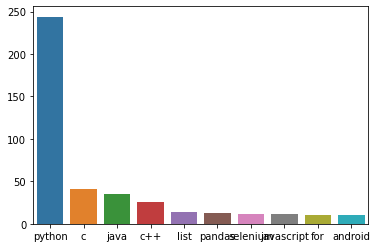

In [13]:
import seaborn as sns

x = [elem[0] for elem in counter.most_common(10)]
y = [elem[1] for elem in counter.most_common(10)]
sns.barplot(x=x,y=y)

<AxesSubplot:title={'center':'Frequency of question in Hashcode'}, xlabel='Tag', ylabel='Frequency'>

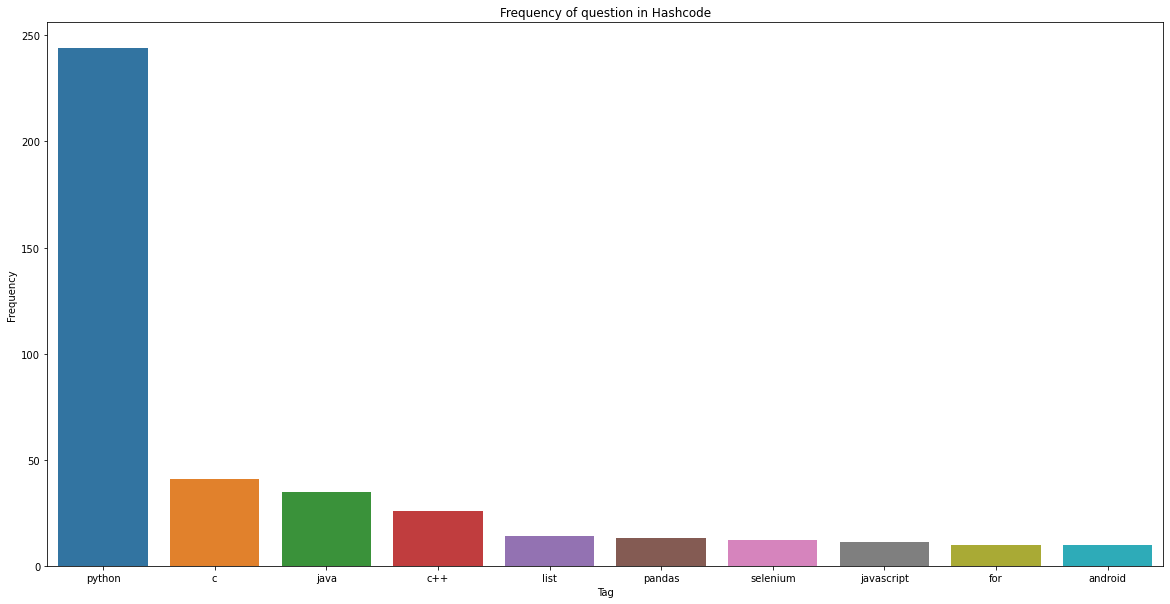

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.title("Frequency of question in Hashcode")
plt.xlabel("Tag")
plt.ylabel("Frequency")

sns.barplot(x=x, y=y)